### **图像二值化**

* THRESH_BINARY 若灰度值大于阈值，取最大值，对于其他值，取0
* THRESH_BINARY_INV 若灰度值大于阈值，取0，对于其他值，取最大值
* THRESH_TRUNC 若灰度值大于阈值，取阈值，对于其他值，不变
* THRESH_TOZERO 若灰度值大于阈值，不变，对于其他值，取0
* THRESH_BINARY_INV 若灰度值大于阈值，取0，对于其他值，不变
* THRESH_OTSU 使用大津法自动寻求全局阈值
* THRESH_TRIANGLE 使用三角形法自动寻求全局阈值

* ADAPTIVE_THRESH_MEAN_C 局部邻域块的平均值，该算法是先求出块中的均值，再减去常数C
* ADAPTIVE_THRESH_GAUSSIAN_C 局部邻域块的高斯加权和，该算法是在区域中(x, y)周围的像素根据高斯函数按照他们离中心点的距离进行加权计算，再减去常数C

In [1]:
# -*- coding:utf-8 -*-
import cv2 as cv
import numpy as np
import sys
%matplotlib inline
import matplotlib.pyplot as plt

rootpath = '/home/zomnk/python_ws/02-OpenCV4/images/'

In [2]:
# 读取图像并判断是否读取成功
img = cv.imread(rootpath +'lena.jpg')[:, :, [2, 1, 0]]
if img is None:
    print('Failed to read lena.jpg')
    sys.exit
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [3]:
# 彩色图像二值化
_, img_B = cv.threshold(img, 125, 255, cv.THRESH_BINARY)
_, img_B_V = cv.threshold(img, 125, 255, cv.THRESH_BINARY_INV)

In [4]:
# 灰度图像二值化
_, gray_B = cv.threshold(gray, 125, 255, cv.THRESH_BINARY)
_, gray_B_V = cv.threshold(gray, 125, 255, cv.THRESH_BINARY_INV)

In [5]:
# 灰度图像TRUNC变换
# TRUNC变换相当于重新给图像的灰度值设定一个最大值，将大于最大值的灰度值全部设置为新的最大值
_, gray_TRUNC = cv.threshold(gray, 125, 255, cv.THRESH_TRUNC)

In [6]:
# 灰度图像TOZERO变换
_, gray_T = cv.threshold(gray, 125, 255, cv.THRESH_TOZERO)
_, gray_T_V = cv.threshold(gray, 125, 255, cv.THRESH_TOZERO_INV)

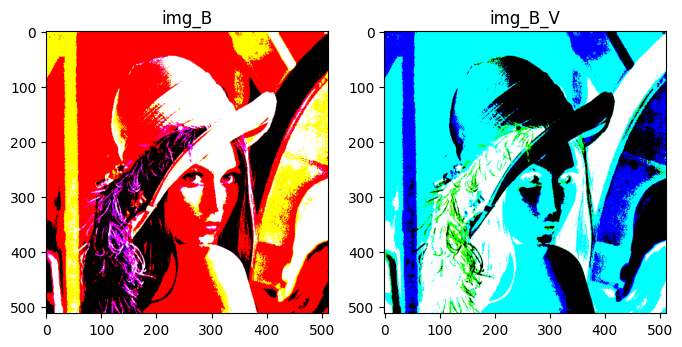

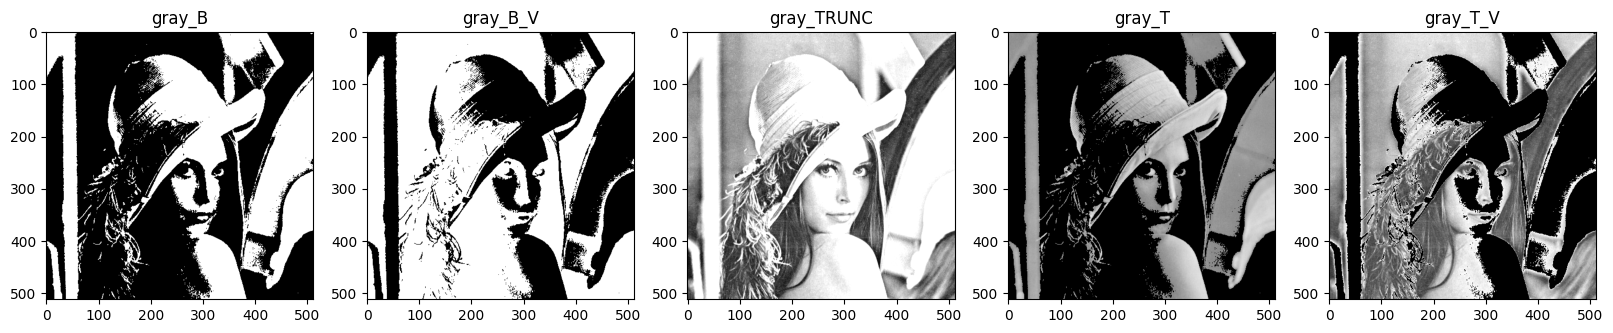

In [7]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('img_B')
plt.imshow(img_B)
plt.subplot(1, 2, 2)
plt.title('img_B_V')
plt.imshow(img_B_V)
plt.figure(figsize=(20, 8))
plt.subplot(1, 5, 1)
plt.title('gray_B')
plt.imshow(gray_B, cmap='gray')
plt.subplot(1, 5, 2)
plt.title('gray_B_V')
plt.imshow(gray_B_V, cmap='gray')
plt.subplot(1, 5, 3)
plt.title('gray_TRUNC')
plt.imshow(gray_TRUNC, cmap='gray')
plt.subplot(1, 5, 4)
plt.title('gray_T')
plt.imshow(gray_T, cmap='gray')
plt.subplot(1, 5, 5)
plt.title('gray_T_V')
plt.imshow(gray_T_V, cmap='gray')

In [8]:
# 灰度图像大津法和三角形法二值化
img1 = cv.imread(rootpath + 'threshold.png', cv.IMREAD_GRAYSCALE)
# 大津法的原理是将图像的灰度直方图在某一阈值处分割为两组，使得两组间的方差最大
_ , img1_O = cv.threshold(img1, 100, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
# 三角形法的原理是通过三角形求得最大直线距离，根据最大直线距离对应的直方图灰度等级即为分割阈值
_, img1_T = cv.threshold(img1, 125, 255, cv.THRESH_BINARY | cv.THRESH_TRIANGLE)

In [9]:
# 灰度图像自适应二值化
# 自适应阈值化计算大概过程是：为每一个像素点单独计算的阈值，即每个像素点的阈值都是不同的，将该像素点周围B*B区域内的像素加权平均，然后减去一个常数C，从而得到该点的阈值。B由参数6指定，常数C由参数7指定
# 均值法，像素邻域大小为13*13，减去的常数为0
adaptive_mean = cv.adaptiveThreshold(img1, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 13, 0)
# 高斯法，像素邻域大小为13*13，减去的常数为0
adaptive_gauss = cv.adaptiveThreshold(img1, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 13, 0)

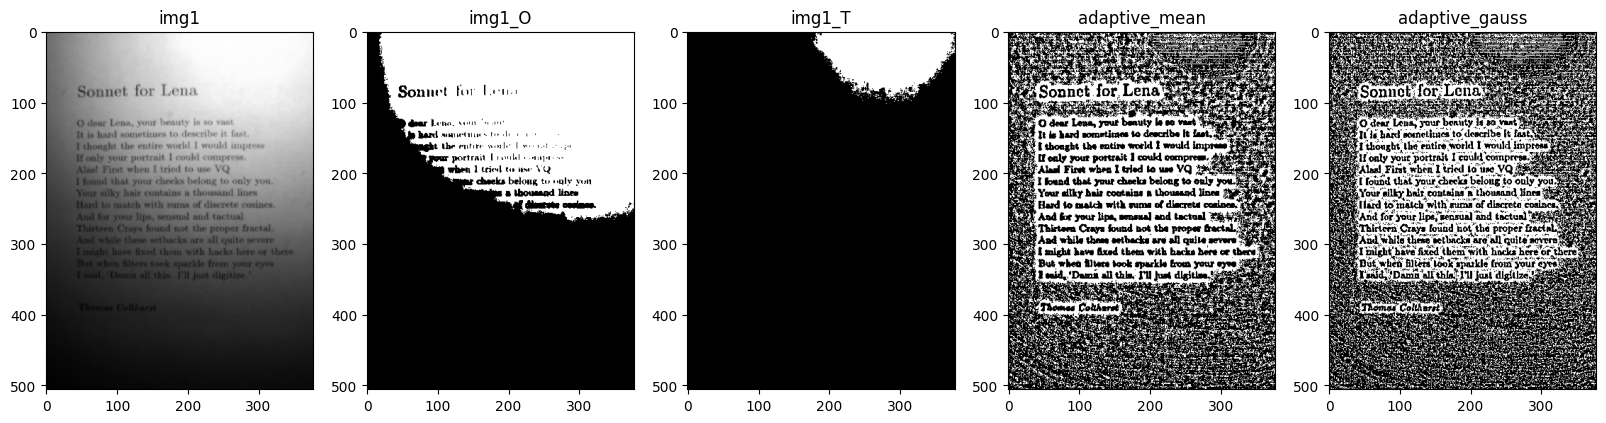

In [10]:
# 自适应阈值能很好的观测到边缘信息
plt.figure(figsize=(20, 8))
plt.subplot(1, 5, 1)
plt.title('img1')
plt.imshow(img1, cmap='gray')
plt.subplot(1, 5, 2)
plt.title('img1_O')
plt.imshow(img1_O, cmap='gray')
plt.subplot(1, 5, 3)
plt.title('img1_T')
plt.imshow(img1_T, cmap='gray')
plt.subplot(1, 5, 4)
plt.title('adaptive_mean')
plt.imshow(adaptive_mean, cmap='gray')
plt.subplot(1, 5, 5)
plt.title('adaptive_gauss')
plt.imshow(adaptive_gauss, cmap='gray')